In [1]:
import json
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN, GRU, LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.wrappers import TimeDistributed
from keras.layers import Convolution1D, MaxPooling1D
import itertools
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np
import os

import progressbar

import tensorflow as tf
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def read_data(rootdir):
    text_l = []
    label_l = []
    for subdir, dirs, files in os.walk(rootdir):
        for fname in files:
            #print os.path.join(subdir, file)
            filepath = subdir + os.sep + fname
            with open(filepath) as f:
                for line1,line2 in itertools.izip_longest(*[f]*2):
                    try:
                        text = ast.literal_eval(line1)
                        label = ast.literal_eval(line2)
                        n_labels = set(label)
                        if len(text) > 3 and len(n_labels) > 1:
                            text_l.append(text)
                            label_l.append(label)
                    except:
                        pass
            f.close()
    return text_l, label_l

In [4]:
X_text, y_text = read_data('../data/input/GO/merged/')

print len(X_text), len(y_text)

text = list(set(itertools.chain(*X_text)))

le = LabelEncoder()
le.fit(text)

w2idx = dict(zip(le.classes_, le.transform(le.classes_)))

idx2w  = {w2idx[k]:k for k in w2idx}

X = []
for each in X_text:
    X.append(le.transform(each))

label = list(set(itertools.chain(*y_text)))

le = LabelEncoder()
le.fit(label)

labels2idx = dict(zip(le.classes_, le.transform(le.classes_)))

idx2la = {labels2idx[k]:k for k in labels2idx}

y = []
for each in y_text:
    y.append(le.transform(each))

print idx2la

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

words_val = [ list(map(lambda x: idx2w[x], w)) for w in X_test]
groundtruth_val = [ list(map(lambda x: idx2la[x], y)) for y in y_test] # y values test
words_train = [ list(map(lambda x: idx2w[x], w)) for w in X_train]
groundtruth_train = [ list(map(lambda x: idx2la[x], y)) for y in y_train] # y values train

n_classes = len(idx2la)
n_vocab = len(idx2w)

9571 9571
{0: 'GO:0000003', 1: 'GO:0000075', 2: 'GO:0000237', 3: 'GO:0000238', 4: 'GO:0000239', 5: 'GO:0000240', 6: 'GO:0000267', 7: 'GO:0000279', 8: 'GO:0000502', 9: 'GO:0000718', 10: 'GO:0000732', 11: 'GO:0000775', 12: 'GO:0000785', 13: 'GO:0000786', 14: 'GO:0000791', 15: 'GO:0000792', 16: 'GO:0000795', 17: 'GO:0000805', 18: 'GO:0000806', 19: 'GO:0000811', 20: 'GO:0001501', 21: 'GO:0001503', 22: 'GO:0001525', 23: 'GO:0001570', 24: 'GO:0001669', 25: 'GO:0001708', 26: 'GO:0001709', 27: 'GO:0001750', 28: 'GO:0001756', 29: 'GO:0001763', 30: 'GO:0001775', 31: 'GO:0001822', 32: 'GO:0001837', 33: 'GO:0001889', 34: 'GO:0001917', 35: 'GO:0001944', 36: 'GO:0001947', 37: 'GO:0001966', 38: 'GO:0001967', 39: 'GO:0002024', 40: 'GO:0002027', 41: 'GO:0002076', 42: 'GO:0003077', 43: 'GO:0005488', 44: 'GO:0005575', 45: 'GO:0005576', 46: 'GO:0005577', 47: 'GO:0005581', 48: 'GO:0005585', 49: 'GO:0005610', 50: 'GO:0005622', 51: 'GO:0005623', 52: 'GO:0005634', 53: 'GO:0005643', 54: 'GO:0005654', 55: 'GO:0

In [5]:
print le.classes_

['GO:0000003' 'GO:0000075' 'GO:0000237' 'GO:0000238' 'GO:0000239'
 'GO:0000240' 'GO:0000267' 'GO:0000279' 'GO:0000502' 'GO:0000718'
 'GO:0000732' 'GO:0000775' 'GO:0000785' 'GO:0000786' 'GO:0000791'
 'GO:0000792' 'GO:0000795' 'GO:0000805' 'GO:0000806' 'GO:0000811'
 'GO:0001501' 'GO:0001503' 'GO:0001525' 'GO:0001570' 'GO:0001669'
 'GO:0001708' 'GO:0001709' 'GO:0001750' 'GO:0001756' 'GO:0001763'
 'GO:0001775' 'GO:0001822' 'GO:0001837' 'GO:0001889' 'GO:0001917'
 'GO:0001944' 'GO:0001947' 'GO:0001966' 'GO:0001967' 'GO:0002024'
 'GO:0002027' 'GO:0002076' 'GO:0003077' 'GO:0005488' 'GO:0005575'
 'GO:0005576' 'GO:0005577' 'GO:0005581' 'GO:0005585' 'GO:0005610'
 'GO:0005622' 'GO:0005623' 'GO:0005634' 'GO:0005643' 'GO:0005654'
 'GO:0005656' 'GO:0005657' 'GO:0005675' 'GO:0005694' 'GO:0005712'
 'GO:0005730' 'GO:0005737' 'GO:0005739' 'GO:0005764' 'GO:0005768'
 'GO:0005773' 'GO:0005776' 'GO:0005777' 'GO:0005783' 'GO:0005792'
 'GO:0005813' 'GO:0005819' 'GO:0005829' 'GO:0005833' 'GO:0005835'
 'GO:00058

In [6]:
print("Example sentence : {}".format(words_train[0]))
print("Encoded form: {}".format(X_train[0]))
print 
print("It's label : {}".format(groundtruth_train[0]))
print("Encoded form: {}".format(y_train[0]))

Example sentence : ['Horizontal', 'sections', 'of', 'the', 'indicated', 'genotypes', 'and', 'ages', 'were', 'stained', 'for', 'nuclei', 'DAPI', 'blue', 'and', 'A', 'Sphase', 'antiBrdU', 'red', 'or', 'B', 'apoptosis', 'TUNEL', 'red']
Encoded form: [ 4221 15898 13962 16858 12246 11543  8079  7915 17610 16356 11348 13883
  2898  8763  8079  1424  6746  8146 15371 14043  1956  8303  7042 15371]

It's label : ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'GO:0005634', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'GO:0006915', 'O', 'O']
Encoded form: [357 357 357 357 357 357 357 357 357 357 357  52 357 357 357 357 357 357
 357 357 357 114 357 357]


## RNN Based

In [7]:
model = Sequential()
model.add(Embedding(n_vocab,100))
model.add(Dropout(0.25))
model.add(SimpleRNN(200,return_sequences=True))
model.add(TimeDistributed(Dense(n_classes, activation='softmax')))
model.compile('rmsprop', 'categorical_crossentropy')

In [8]:
### Training
n_epochs = 10

train_loss = []
val_loss = []

for i in range(n_epochs):
    print("Epoch {}".format(i))
    
    print("Training =>")
    train_pred_label = []
    avgLoss = 0


    bar = progressbar.ProgressBar(maxval=len(X_train))
    for n_batch, sent in bar(enumerate(X_train)):
        label = y_train[n_batch]
        label = np.eye(n_classes)[label][np.newaxis,:]
        sent = sent[np.newaxis,:]

        if sent.shape[1] > 1: #some bug in keras
            loss = model.train_on_batch(sent, label)
            avgLoss += loss

        pred = model.predict_on_batch(sent)
        pred = np.argmax(pred,-1)[0]
        train_pred_label.append(pred)

    avgLoss = avgLoss/n_batch
    train_loss.append(avgLoss)
    
    
    predword_train = [ list(map(lambda x: idx2la[x], y)) for y in train_pred_label]
    
    print("Validating =>")
    
    val_pred_label = []
    avgLoss = 0
    
    bar = progressbar.ProgressBar(maxval=len(X_test))
    for n_batch, sent in bar(enumerate(X_test)):
        label = y_test[n_batch]
        label = np.eye(n_classes)[label][np.newaxis,:]
        sent = sent[np.newaxis,:]
        
        if sent.shape[1] > 1: #some bug in keras
            loss = model.test_on_batch(sent, label)
            avgLoss += loss

        pred = model.predict_on_batch(sent)
        pred = np.argmax(pred,-1)[0]
        val_pred_label.append(pred)

    avgLoss = avgLoss/n_batch
    val_loss.append(avgLoss)
    predword_val = [ list(map(lambda x: idx2la[x], y)) for y in val_pred_label]



Epoch 0
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 1
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 2
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 3
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 4
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 5
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 6
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 7
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 8
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 9
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


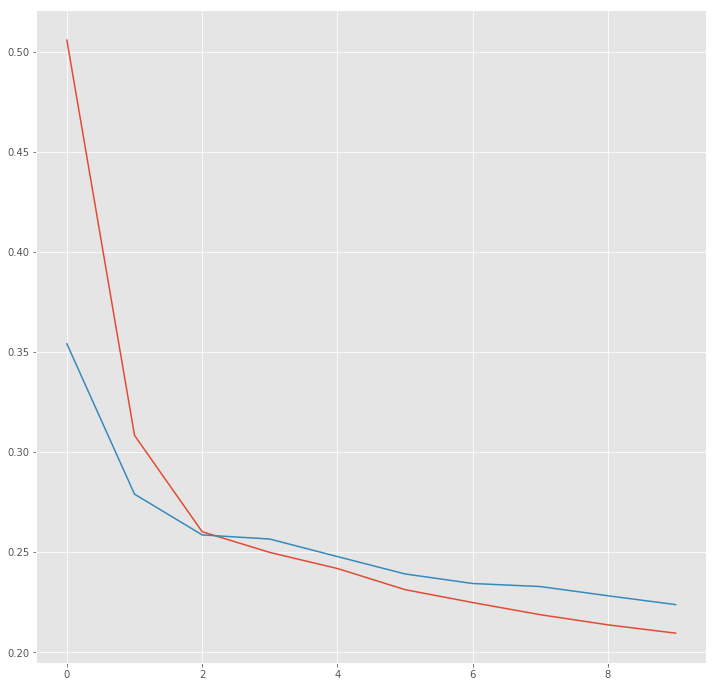

In [9]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.show()

In [10]:
print classification_report(list(itertools.chain.from_iterable(groundtruth_val)), 
                            list(itertools.chain.from_iterable(predword_val)))

                        precision    recall  f1-score   support

            GO:0000003       0.61      0.50      0.55       133
            GO:0000075       0.00      0.00      0.00        13
            GO:0000237       0.00      0.00      0.00         3
            GO:0000238       0.00      0.00      0.00         2
            GO:0000239       0.95      0.88      0.91        24
            GO:0000240       0.00      0.00      0.00        16
            GO:0000267       0.00      0.00      0.00         8
            GO:0000718       0.00      0.00      0.00         1
            GO:0000732       0.00      0.00      0.00         9
            GO:0000775       0.00      0.00      0.00         5
            GO:0000785       0.97      0.94      0.96        35
            GO:0000786       0.00      0.00      0.00         5
            GO:0000791       0.00      0.00      0.00         2
            GO:0000792       1.00      1.00      1.00        21
            GO:0000795       0.00      

/home/sdmohant/.virtualenvs/deeplearn/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
import pandas as pd

df1 = pd.DataFrame(
{
    'Predicted' : list(itertools.chain.from_iterable(predword_val)),
    'Ground Truth': list(itertools.chain.from_iterable(groundtruth_val))
}
)

In [12]:
df1.to_csv('../data/results/GO_merged_RNN_Based.tsv', sep='\t')

In [13]:
%run ./accuracy/src/computeSim.py ../data/results/GO_merged_RNN_Based.tsv ../data/validation_data/GO_AllSubsumers.tsv

Mean semantic similarity:  0.717


## GRU Based

In [16]:
print('Build model...')
model = Sequential()
model.add(Embedding(n_vocab,100))
model.add(Convolution1D(64,5,border_mode='same', activation='relu'))
model.add(Dropout(0.25))
model.add(GRU(200,return_sequences=True))
model.add(TimeDistributed(Dense(n_classes, activation='softmax')))
model.compile('rmsprop', 'categorical_crossentropy')

Build model...


/home/sdmohant/.virtualenvs/deeplearn/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 5, padding="same", activation="relu")`
  after removing the cwd from sys.path.


In [17]:
### Training
n_epochs = 10

train_f_scores = []
val_f_scores = []
best_val_f1 = 0

for i in range(n_epochs):
    print("Epoch {}".format(i))
    
    print("Training =>")
    train_pred_label = []
    avgLoss = 0


    bar = progressbar.ProgressBar(maxval=len(X_train))
    for n_batch, sent in bar(enumerate(X_train)):
        label = y_train[n_batch]
        label = np.eye(n_classes)[label][np.newaxis,:]
        sent = sent[np.newaxis,:]

        if sent.shape[1] > 1: #some bug in keras
            loss = model.train_on_batch(sent, label)
            avgLoss += loss

        pred = model.predict_on_batch(sent)
        pred = np.argmax(pred,-1)[0]
        train_pred_label.append(pred)

    avgLoss = avgLoss/n_batch
    
    predword_train = [ list(map(lambda x: idx2la[x], y)) for y in train_pred_label]
    
    
    print("Validating =>")
    
    val_pred_label = []
    avgLoss = 0
    
    bar = progressbar.ProgressBar(maxval=len(X_test))
    for n_batch, sent in bar(enumerate(X_test)):
        label = y_test[n_batch]
        label = np.eye(n_classes)[label][np.newaxis,:]
        sent = sent[np.newaxis,:]
        
        if sent.shape[1] > 1: #some bug in keras
            loss = model.test_on_batch(sent, label)
            avgLoss += loss

        pred = model.predict_on_batch(sent)
        pred = np.argmax(pred,-1)[0]
        val_pred_label.append(pred)

    avgLoss = avgLoss/n_batch
    
    predword_val = [ list(map(lambda x: idx2la[x], y)) for y in val_pred_label]

print classification_report(list(itertools.chain.from_iterable(groundtruth_val)), 
                            list(itertools.chain.from_iterable(predword_val)))

Epoch 0
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 1
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 2
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 3
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 4
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 5
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 6
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 7
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 8
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 9
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


                        precision    recall  f1-score   support

            GO:0000003       0.48      0.52      0.50       133
            GO:0000075       0.00      0.00      0.00        13
            GO:0000237       0.00      0.00      0.00         3
            GO:0000238       0.00      0.00      0.00         1
            GO:0000239       0.48      0.58      0.53        24
            GO:0000240       0.00      0.00      0.00         9
            GO:0000267       0.00      0.00      0.00        10
            GO:0000732       0.00      0.00      0.00        12
            GO:0000775       0.00      0.00      0.00         4
            GO:0000785       0.00      0.00      0.00        30
            GO:0000786       0.00      0.00      0.00         4
            GO:0000791       0.00      0.00      0.00         2
            GO:0000792       0.73      0.86      0.79        22
            GO:0000795       0.00      0.00      0.00         4
            GO:0000805       0.00      

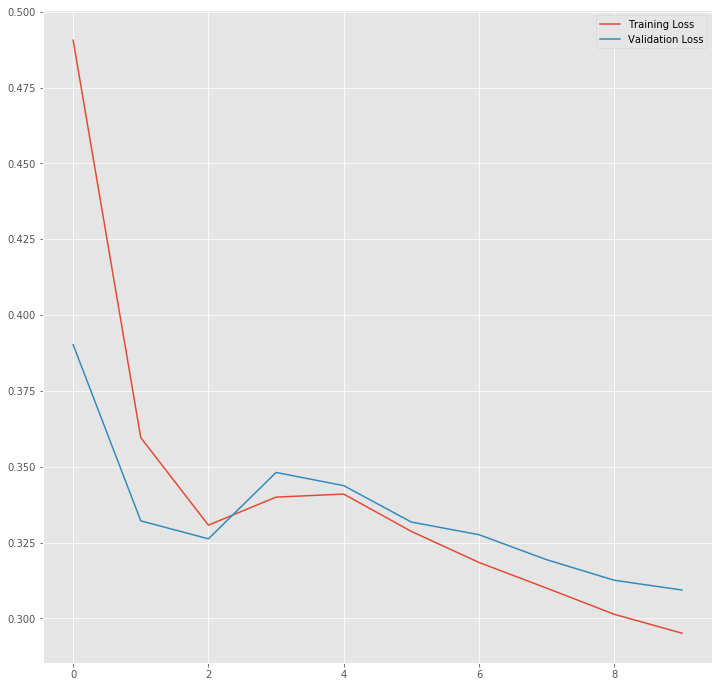

In [18]:
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

In [19]:
# print groundtruth_val, predword_val

In [20]:
import pandas as pd

df = pd.DataFrame(
{
    'Predicted' : list(itertools.chain.from_iterable(predword_val)),
    'Ground Truth': list(itertools.chain.from_iterable(groundtruth_val))
}
)

In [21]:
df.to_csv('../data/results/GRU_Based.tsv', sep='\t')

In [22]:
%run ./accuracy/src/computeSim.py ../data/results/GRU_Based.tsv ../data/validation_data/GO_AllSubsumers.tsv

Mean semantic similarity:  0.485
